# Comparing molecules among Datasets:
#### CSAR - DUD - DEKOIS2.0 - Cocristalized Molecules

In [20]:
import pickle
import pandas as pd
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='talk', font_scale=0.9)

In [2]:
# Import the dictionary of dataframes with the rdkit molecules
file_rd_mols = './rdKit_db_molecules.obj'
with open(file_rd_mols, 'rb') as f:
    lig_datasets = pickle.load(f)
print(lig_datasets.keys())

dict_keys(['COCRYS', 'CSAR', 'DUD', 'DEKOIS'])


### Molecular Weight and Number of Heavy atoms

In [35]:
from rdkit.Chem import Descriptors, Lipinski, rdMolDescriptors
from rdkit.Chem.rdmolops import FastFindRings

# Get the molecular weight and # of heavy atoms for each ligand
for dataset in lig_datasets.values():
    # molecular weight
    dataset['MW'] = [round(Descriptors.MolWt(m), 3) for m in dataset['mol_rdk']]
    # number of heavy atoms
    dataset['num_atoms'] = [round(Chem.Lipinski.HeavyAtomCount(m), 3) for m in dataset['mol_rdk']]
    # Update ring properties
    mol_update = [FastFindRings(m) for m in dataset['mol_rdk']]
    # Get number of rotamers
    dataset['num_rot'] = [round(Chem.Lipinski.NumRotatableBonds(m), 3) for m in dataset['mol_rdk']]
    # Get number of rings
    dataset['num_rings'] = [round(rdMolDescriptors.CalcNumRings(m), 3) for m in dataset['mol_rdk']]
    


In [4]:
from helper_functions_2 import violin_plot_helper

### Molecular Weight
#### All molecules

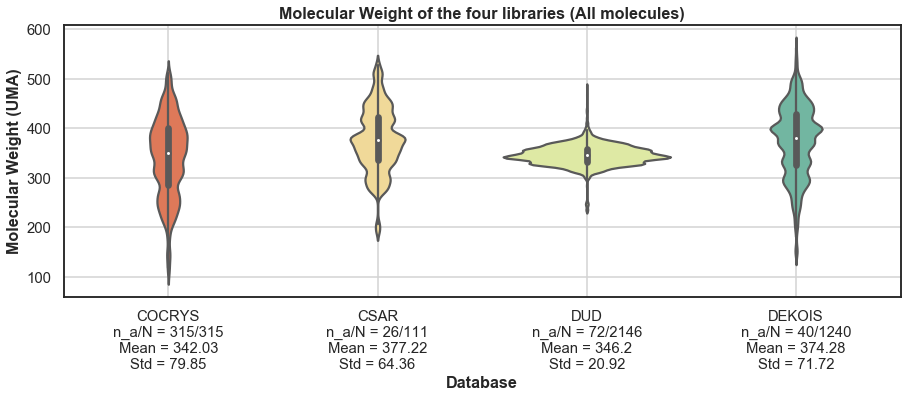

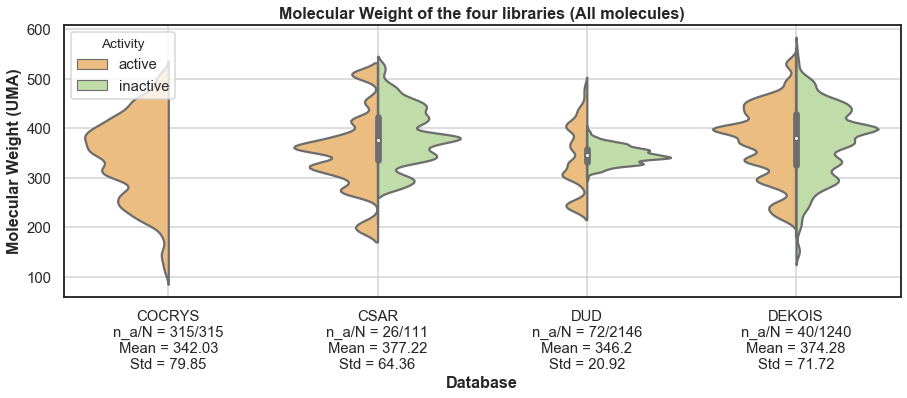

In [38]:
violin_plot_helper('MW', lig_datasets,
                   title = 'Molecular Weight of the four libraries (All molecules)',
                   xlabel= 'Database', ylabel = 'Molecular Weight (UMA)', split=False)
violin_plot_helper('MW', lig_datasets,
                   title = 'Molecular Weight of the four libraries (All molecules)',
                   xlabel= 'Database', ylabel = 'Molecular Weight (UMA)', split=True)

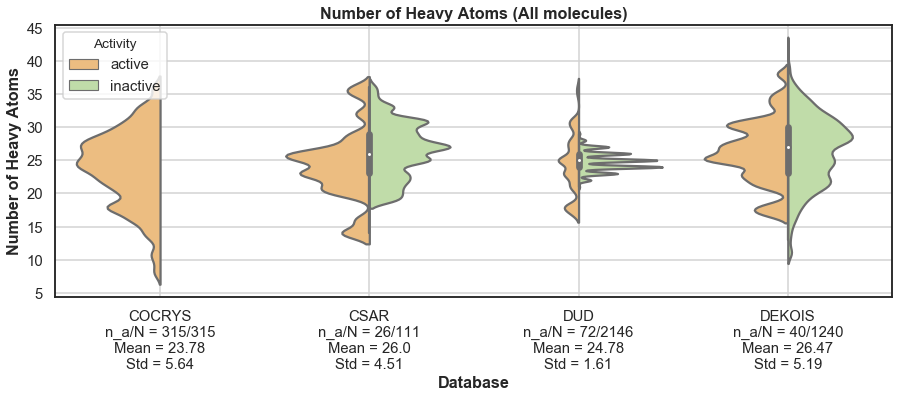

In [21]:
violin_plot_helper('num_atoms', lig_datasets,
                   title = 'Number of Heavy Atoms (All molecules)',
                   xlabel= 'Database', ylabel = 'Number of Heavy Atoms', split=True)

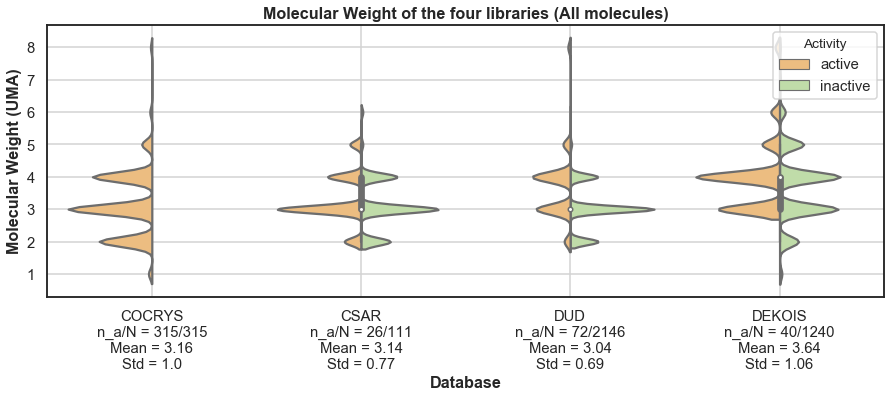

In [36]:
violin_plot_helper('num_rings', lig_datasets,
                   title = 'Molecular Weight of the four libraries (All molecules)',
                   xlabel= 'Database', ylabel = 'Molecular Weight (UMA)', split=True)

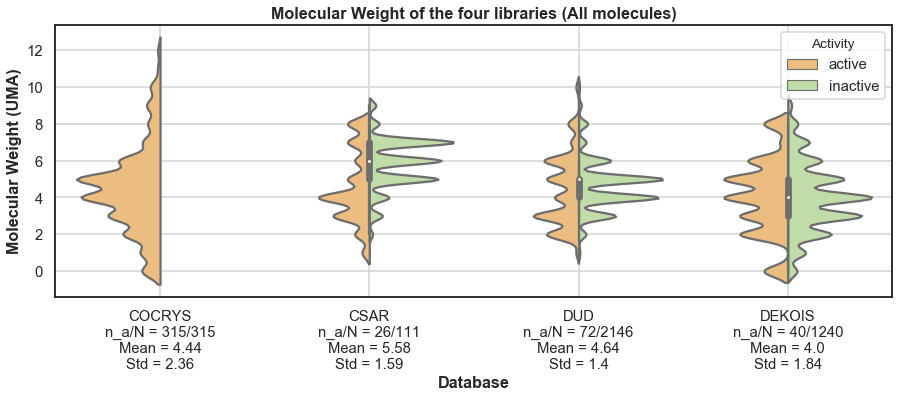

In [37]:
violin_plot_helper('num_rot', lig_datasets,
                   title = 'Molecular Weight of the four libraries (All molecules)',
                   xlabel= 'Database', ylabel = 'Molecular Weight (UMA)', split=True)